In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

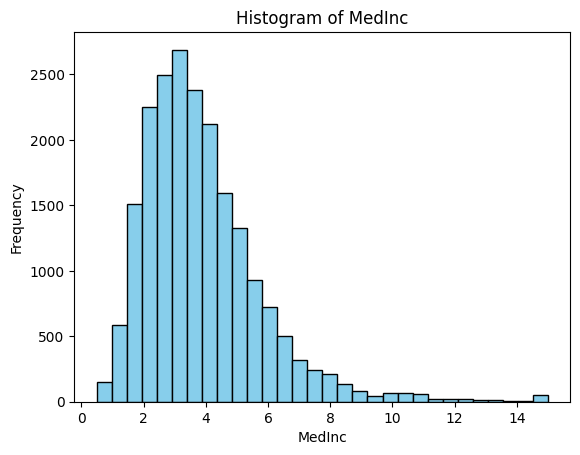

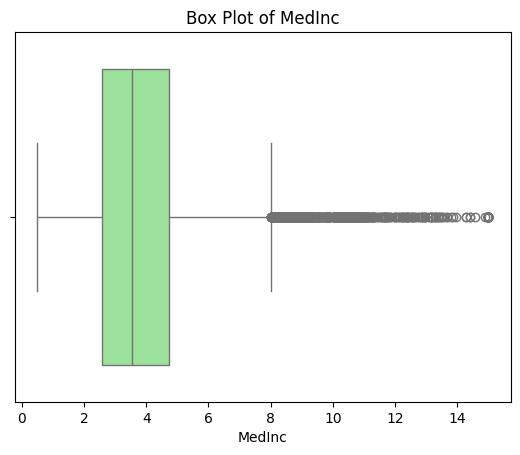

Outliers in MedInc:
9019      8.0137
9026      8.0144
18088     8.0158
5355      8.0239
8877      8.0257
          ...   
5275     15.0001
17858    15.0001
18504    15.0001
18501    15.0001
1566     15.0001
Name: MedInc, Length: 681, dtype: float64
----------------------------------------


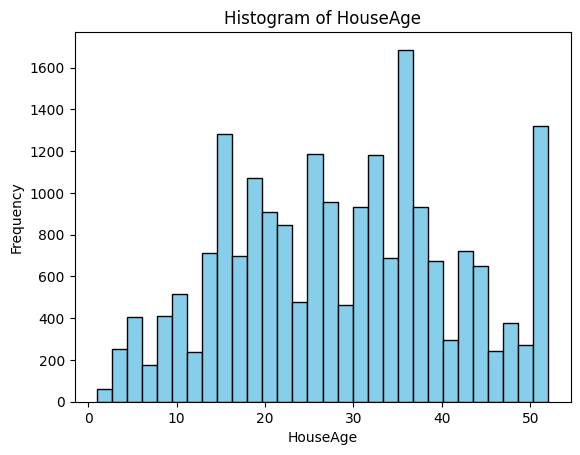

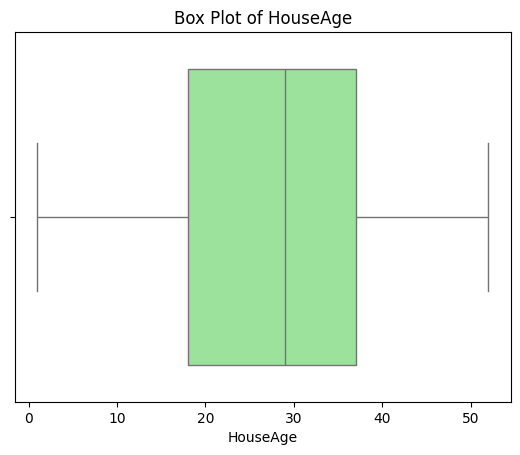

Outliers in HouseAge:
None
----------------------------------------


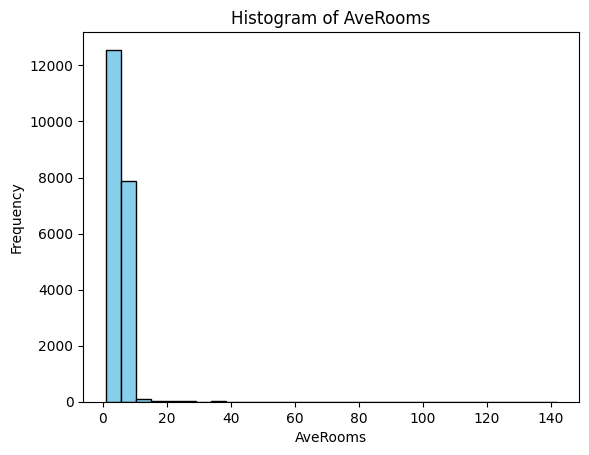

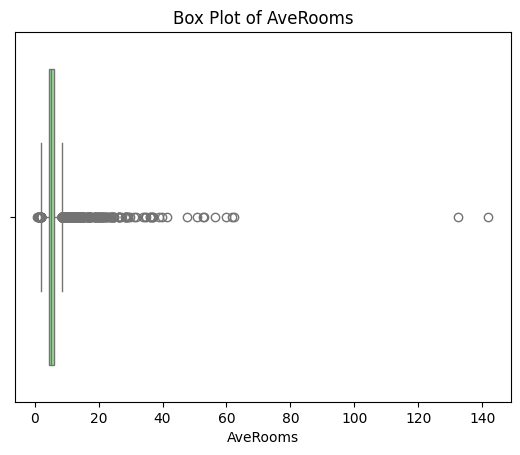

Outliers in AveRooms:
5916       0.846154
8219       0.888889
3126       1.000000
14818      1.130435
17820      1.130435
            ...    
11862     59.875000
1913      61.812500
12447     62.422222
1979     132.533333
1914     141.909091
Name: AveRooms, Length: 511, dtype: float64
----------------------------------------


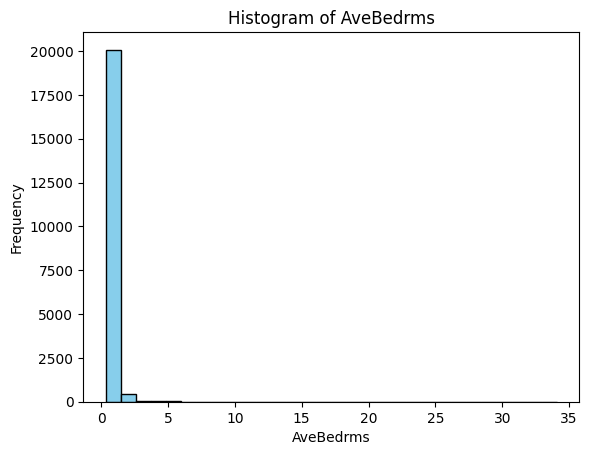

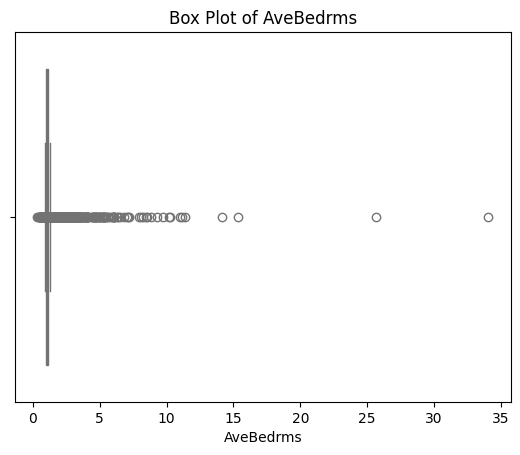

Outliers in AveBedrms:
20248     0.333333
13606     0.375000
12649     0.444444
12138     0.500000
3125      0.500000
           ...    
9676     11.410714
12447    14.111111
11862    15.312500
1914     25.636364
1979     34.066667
Name: AveBedrms, Length: 1424, dtype: float64
----------------------------------------


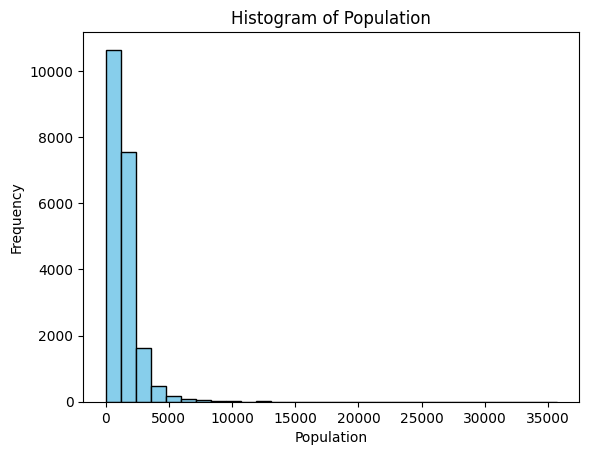

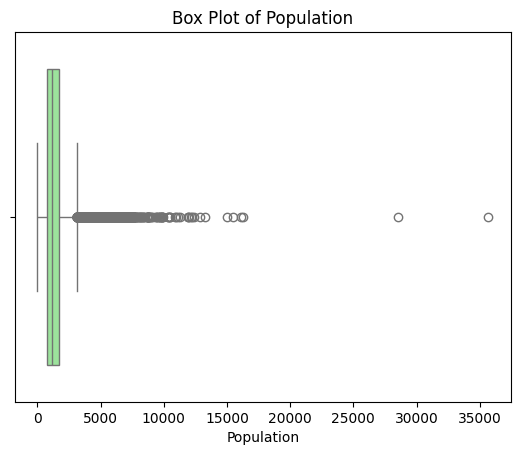

Outliers in Population:
15883     3134.0
3419      3134.0
12454     3134.0
5329      3136.0
12231     3136.0
          ...   
6057     15507.0
10309    16122.0
13139    16305.0
9880     28566.0
15360    35682.0
Name: Population, Length: 1196, dtype: float64
----------------------------------------


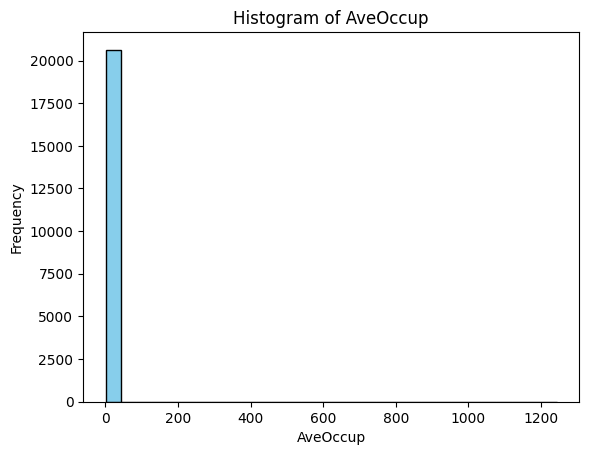

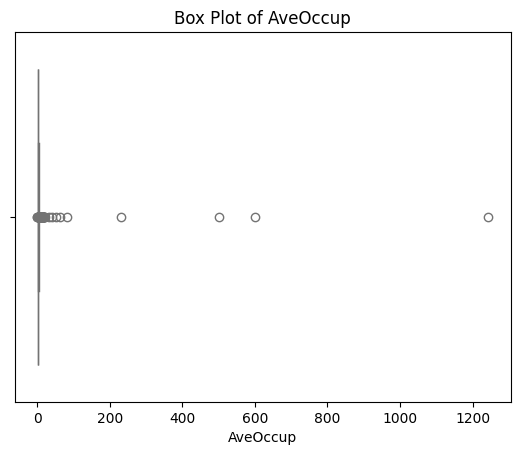

Outliers in AveOccup:
11849       0.692308
5342        0.750000
19522       0.970588
19427       1.060606
4623        1.066176
            ...     
9172       83.171429
13034     230.172414
16669     502.461538
3364      599.714286
19006    1243.333333
Name: AveOccup, Length: 711, dtype: float64
----------------------------------------


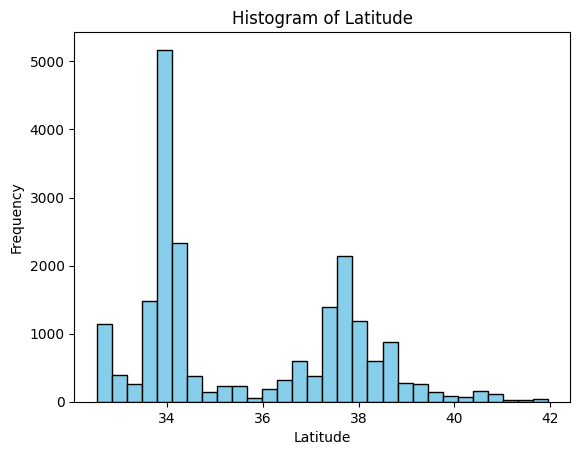

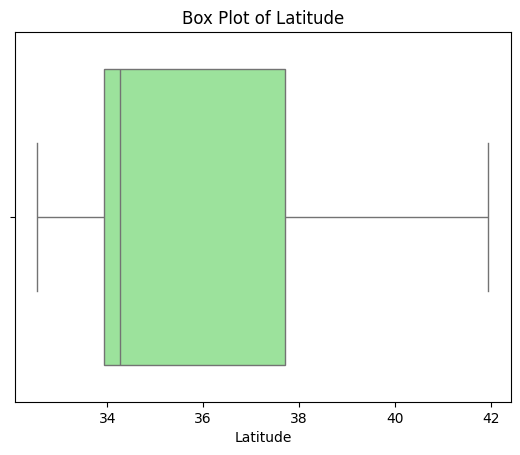

Outliers in Latitude:
None
----------------------------------------


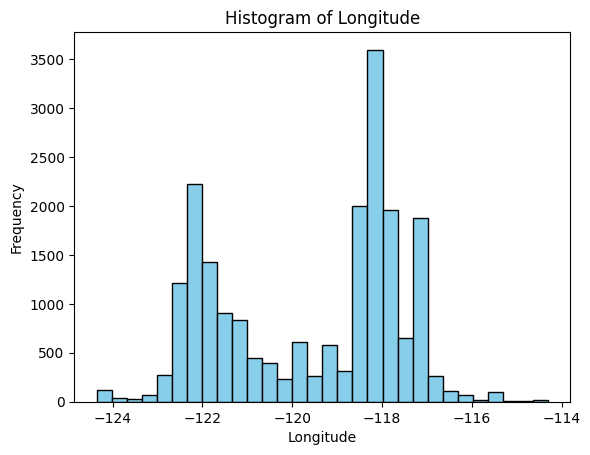

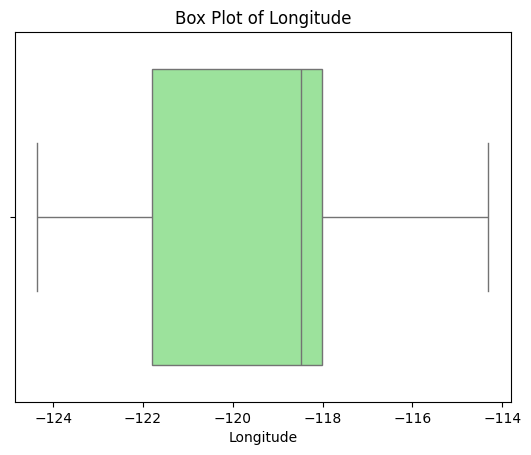

Outliers in Longitude:
None
----------------------------------------


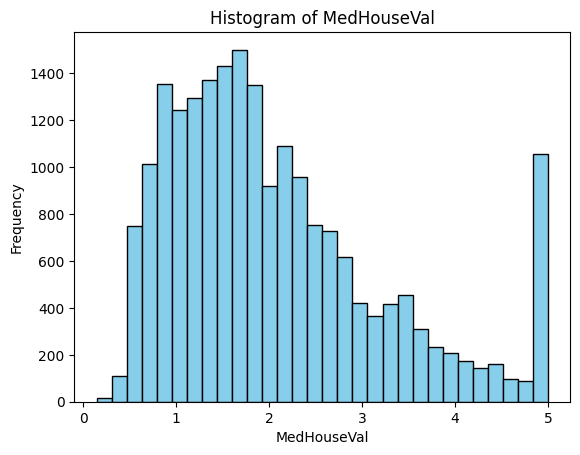

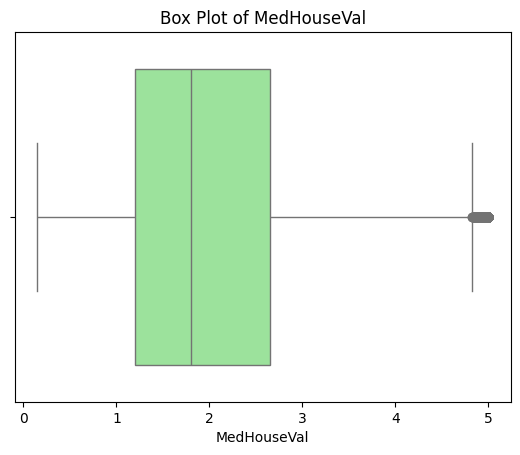

Outliers in MedHouseVal:
14817    4.82700
10734    4.82900
4018     4.83100
16127    4.83300
16990    4.83300
          ...   
20426    5.00001
20427    5.00001
20436    5.00001
20443    5.00001
89       5.00001
Name: MedHouseVal, Length: 1071, dtype: float64
----------------------------------------


In [3]:
# Load data
data = fetch_california_housing(as_frame=True).frame
# Get numerical columns
nums = data.select_dtypes(include=['number']).columns

# Histograms and boxplots
for col in nums:
    # Histogram
    plt.hist(data[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')                
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    
    # Boxplot
    sns.boxplot(x=data[col], color='lightgreen')
    plt.title(f'Box Plot of {col}')
    plt.show()
    
     # Outliers
    Q1, Q3 = data[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    outliers = data[(data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)]
    
    print(f"Outliers in {col}:")
    if outliers.empty:
        print("None")
    else:
        print(outliers[col].sort_values())
    print("-" * 40)